In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras import layers

### Getting datasets from tensorflow instead of keras

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.OEF9KE_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.OEF9KE_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year

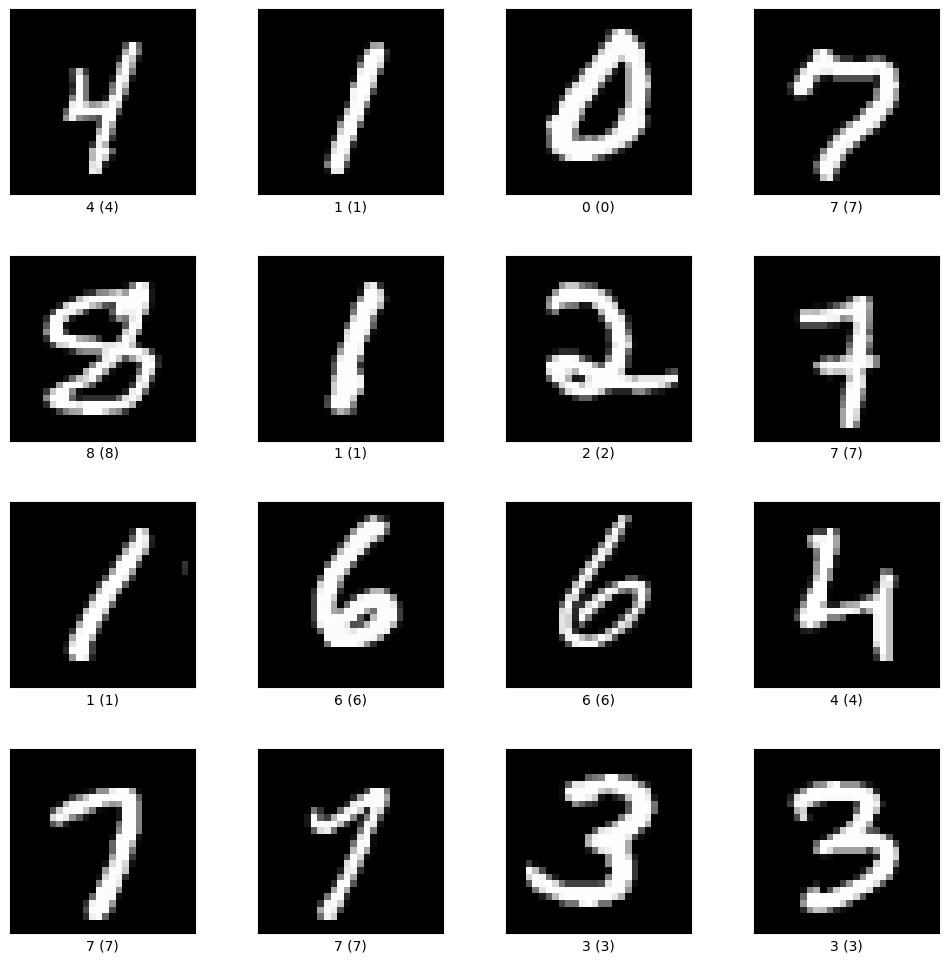

In [ ]:
fig=tfds.show_examples(ds_train,ds_info,rows=4,cols=4)

In [ ]:
def normalize(image,label):
  return tf.cast(image,tf.float32)/255.0, label

In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
BATCH_SIZE=64
ds_train=ds_train.map(normalize)
ds_train=ds_train.batch(BATCH_SIZE)
ds_train=ds_train.prefetch(AUTOTUNE)

ds_test=ds_test.map(normalize,num_parallel_calls=AUTOTUNE)
ds_test=ds_test.batch(BATCH_SIZE)
ds_test=ds_test.prefetch(AUTOTUNE)

In [ ]:
model=keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(32,3,activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(3e-4),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(ds_train,epochs=10,verbose=2,validation_data=ds_test)

Epoch 1/10
938/938 - 11s - 11ms/step - accuracy: 0.8797 - loss: 0.4669 - val_accuracy: 0.9422 - val_loss: 0.2053
Epoch 2/10
938/938 - 4s - 4ms/step - accuracy: 0.9510 - loss: 0.1737 - val_accuracy: 0.9639 - val_loss: 0.1347
Epoch 3/10
938/938 - 5s - 5ms/step - accuracy: 0.9664 - loss: 0.1228 - val_accuracy: 0.9705 - val_loss: 0.1042
Epoch 4/10
938/938 - 5s - 5ms/step - accuracy: 0.9732 - loss: 0.0979 - val_accuracy: 0.9744 - val_loss: 0.0878
Epoch 5/10
938/938 - 5s - 6ms/step - accuracy: 0.9772 - loss: 0.0832 - val_accuracy: 0.9768 - val_loss: 0.0779
Epoch 6/10
938/938 - 6s - 6ms/step - accuracy: 0.9798 - loss: 0.0734 - val_accuracy: 0.9782 - val_loss: 0.0713
Epoch 7/10
938/938 - 3s - 3ms/step - accuracy: 0.9818 - loss: 0.0662 - val_accuracy: 0.9789 - val_loss: 0.0668
Epoch 8/10
938/938 - 3s - 4ms/step - accuracy: 0.9831 - loss: 0.0607 - val_accuracy: 0.9794 - val_loss: 0.0636
Epoch 9/10
938/938 - 4s - 5ms/step - accuracy: 0.9843 - loss: 0.0562 - val_accuracy: 0.9797 - val_loss: 0.0613

In [ ]:
(ds_train,ds_test),ds_info=tfds.load(
    'imdb_reviews',
    split=['train','test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.88PCHW_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.88PCHW_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.88PCHW_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmp546oo8agtfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [ ]:
tokenizer=tfds.deprecated.text.Tokenizer()

In [ ]:
def build_vocabulary():
  vocabulary=set()
  for text,label in ds_train:
    vocabulary.update(tokenizer.tokenize(text.numpy().lower()))
  return vocabulary


In [ ]:
vocabulary=build_vocabulary()

In [ ]:
vocabulary

{'togetherness',
 'entangle',
 'finacee',
 'envelops',
 'mbongeni',
 'accessed',
 'verges',
 'turakistan',
 'hilt',
 'feminists',
 'greenhorn',
 'doin',
 'possessed',
 'domicile',
 'connie',
 'tractors',
 'hairdo',
 'snobbishness',
 'dubliner',
 'serpico',
 'baseman',
 'zoological',
 'shun',
 'whomever',
 'chilean',
 'molding',
 'fieldsian',
 'raindeer',
 'underscoring',
 'feiss',
 'fin',
 'matar',
 'bedevils',
 'radely',
 'prochnow',
 'improvises',
 'imitator',
 'helo',
 'unforunatley',
 'terrifyng',
 'plot',
 'adjust',
 'talia',
 '2023',
 'passive',
 'rationalism',
 'mulit',
 'thougths',
 'forgiving',
 'hawks',
 'redfield',
 'nofth',
 'jerzy',
 'lorens',
 'talky',
 'kook',
 'flamingoes',
 'stored',
 'ap3',
 'rundown',
 'cracker',
 'malditos',
 'substances',
 'veers',
 'hoops',
 'radiating',
 '0083',
 'poll',
 'chio',
 'godfather',
 'matilda',
 'figg',
 'whitworth',
 'hobbesian',
 'saintliness',
 'anneliza',
 'narsimha',
 'quintin',
 'rycart',
 'sathoor',
 'kristan',
 'elie',
 'squeak

In [ ]:
len(vocabulary)

74893

In [ ]:
encoder=tfds.deprecated.text.TokenTextEncoder(vocabulary,oov_token='<UNK>',tokenizer=tokenizer,lowercase=True)
print(vocabulary)

{'togetherness', 'entangle', 'finacee', 'envelops', 'mbongeni', 'accessed', 'verges', 'turakistan', 'hilt', 'feminists', 'greenhorn', 'doin', 'possessed', 'domicile', 'connie', 'tractors', 'hairdo', 'snobbishness', 'dubliner', 'serpico', 'baseman', 'zoological', 'shun', 'whomever', 'chilean', 'molding', 'fieldsian', 'raindeer', 'underscoring', 'feiss', 'fin', 'matar', 'bedevils', 'radely', 'prochnow', 'improvises', 'imitator', 'helo', 'unforunatley', 'terrifyng', 'plot', 'adjust', 'talia', '2023', 'passive', 'rationalism', 'mulit', 'thougths', 'forgiving', 'hawks', 'redfield', 'nofth', 'jerzy', 'lorens', 'talky', 'kook', 'flamingoes', 'stored', 'ap3', 'rundown', 'cracker', 'malditos', 'substances', 'veers', 'hoops', 'radiating', '0083', 'poll', 'chio', 'godfather', 'matilda', 'figg', 'whitworth', 'hobbesian', 'saintliness', 'anneliza', 'narsimha', 'quintin', 'rycart', 'sathoor', 'kristan', 'elie', 'squeaky', 'appearances', 'ballplayer', 'blueish', 'perilously', 'flight', 'proudfeet', '

In [ ]:
def my_encodings(text_tensor,label):
  return encoder.encode(text_tensor.numpy()),label

In [ ]:
def encoding_map(text,label):
  encoded_text,label=tf.py_function(my_encodings,inp=[text,label],Tout=(tf.int64,tf.int64))
  encoded_text.set_shape([None])
  label.set_shape([])
  return encoded_text,label

In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
BATCH_SIZE=32
ds_train=ds_train.map(encoding_map,num_parallel_calls=AUTOTUNE)
ds_train=ds_train.padded_batch(BATCH_SIZE)
ds_train=ds_train.prefetch(AUTOTUNE)

ds_test=ds_test.map(encoding_map)
ds_test=ds_test.padded_batch(BATCH_SIZE)
ds_test=ds_test.prefetch(AUTOTUNE)

In [ ]:
model=keras.Sequential([
    layers.Masking(mask_value=0), #ignore padding values
    layers.Embedding(input_dim=len(vocabulary)+2,output_dim=300), #+2 padding + OOV tokens -- output(batch_size,seq_length,embedding_size)
    layers.GlobalAveragePooling1D(),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(3e-4),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(ds_train,epochs=10,verbose=2,validation_data=ds_test)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'embedding' (of type Embedding) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


782/782 - 428s - 548ms/step - accuracy: 0.5540 - loss: 0.6799 - val_accuracy: 0.5530 - val_loss: 0.6677
Epoch 2/10
782/782 - 48s - 61ms/step - accuracy: 0.7480 - loss: 0.5160 - val_accuracy: 0.8301 - val_loss: 0.4237
Epoch 3/10
782/782 - 48s - 62ms/step - accuracy: 0.8272 - loss: 0.3895 - val_accuracy: 0.8256 - val_loss: 0.3816
Epoch 4/10
782/782 - 67s - 85ms/step - accuracy: 0.8564 - loss: 0.3338 - val_accuracy: 0.8395 - val_loss: 0.3569
Epoch 5/10
782/782 - 48s - 61ms/step - accuracy: 0.8734 - loss: 0.2999 - val_accuracy: 0.8433 - val_loss: 0.3486
Epoch 6/10
782/782 - 48s - 62ms/step - accuracy: 0.8900 - loss: 0.2686 - val_accuracy: 0.8418 - val_loss: 0.3522
Epoch 7/10
782/782 - 67s - 86ms/step - accuracy: 0.8994 - loss: 0.2490 - val_accuracy: 0.8392 - val_loss: 0.3611
Epoch 8/10
782/782 - 47s - 60ms/step - accuracy: 0.9066 - loss: 0.2349 - val_accuracy: 0.8250 - val_loss: 0.3964
Epoch 9/10
782/782 - 67s - 86ms/step - accuracy: 0.9131 - loss: 0.2215 - val_accuracy: 0.8113 - val_loss: